# Задание 5. Построение графиков ROC, PR, precision(threshold), recall(threshold)

In [1]:
import numpy as np

## Строим confusion_matrix

In [2]:
def confusion_matrix(H, L, threshold):
    confusion_matrix = np.zeros((2, 2))
    full_square = H * L / 2
    FN = full_square * (threshold / L) ** 2
    FP = full_square * (1 - threshold / L) ** 2

    TN = full_square - FP
    TP = full_square - FN

    confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1] = TN, FP, FN, TP

    return confusion_matrix

## Определяем область нашего задания и thresholds

In [3]:
H, L = 1, 3
thresholds = np.linspace(0, L-0.02, 150)

## Строим графики precision(threshold) и recall(threshold)

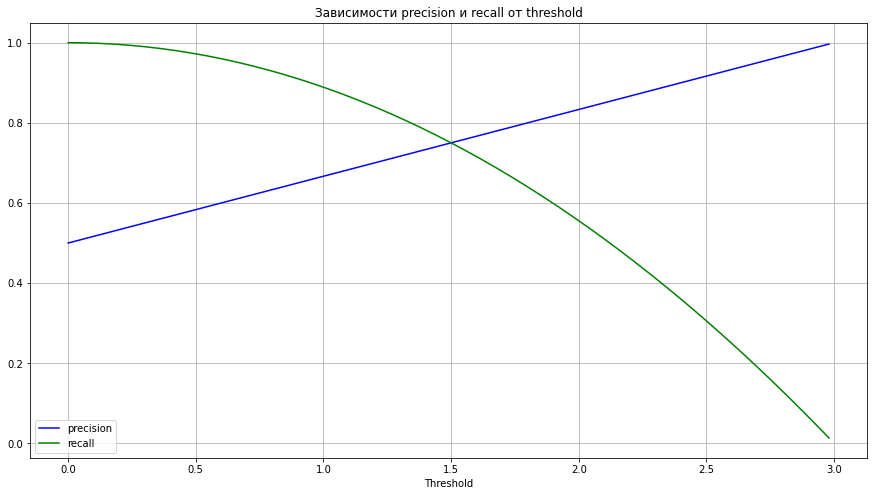

In [4]:
precision_array = np.zeros_like(thresholds)
recall_array = np.zeros_like(thresholds)

for i in range(thresholds.size):
    conf_matrix = confusion_matrix(H, L, thresholds[i])


    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]
    
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN)

    precision_array[i] = precision
    recall_array[i] = recall

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.plot(thresholds, precision_array, c='b', label='precision' )
plt.plot(thresholds, recall_array, c='g', label='recall')

plt.xlabel('Threshold')
plt.title('Зависимости precision и recall от threshold')
plt.legend(loc = "lower left")
plt.grid()

plt.show()

## Построение RC-кривой

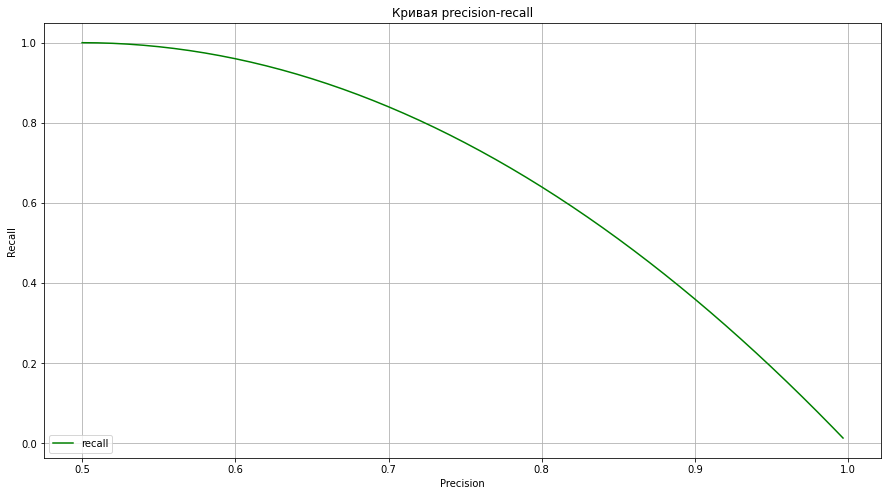

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.plot(precision_array, recall_array, c='g', label = 'recall')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Кривая precision-recall')
plt.legend(loc = "lower left")
plt.grid()

plt.show()

## Посроение ROC-кривой

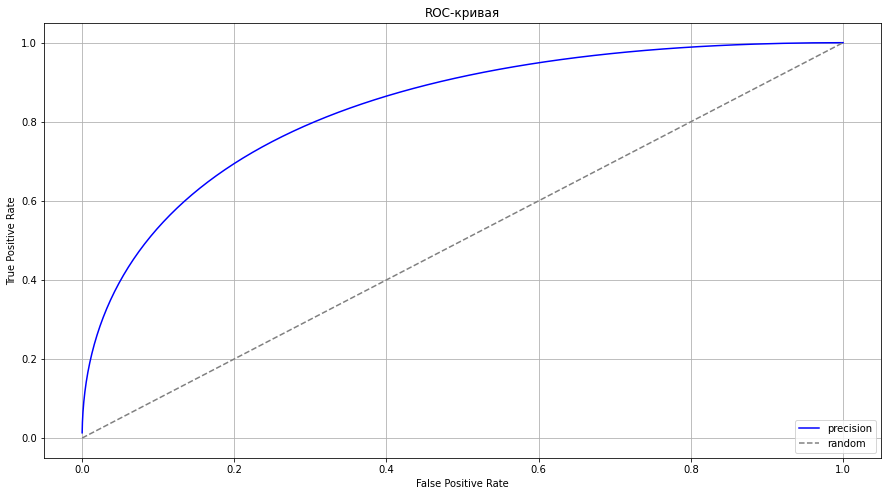

In [6]:
FPR_array = np.zeros_like(thresholds)
TPR_array = np.zeros_like(thresholds)

for i in range(thresholds.size):
    conf_matrix = confusion_matrix(H, L, thresholds[i])


    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]
    
    FPR = FP / (TN + FP) 
    TPR = TP / (TP + FN)

    FPR_array[i] = FPR
    TPR_array[i] = TPR    

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.plot(FPR_array, TPR_array, c='b', label = 'precision' )
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc = "lower right")
plt.grid()

plt.show()